## **MACHINE LEARNING ASSIGNMENT 07**

IMAAD IMRAN HAJWANE  
202101132 / 21  
LY - 7th SEMESTER  

STATEMENT:  
IMPLEMENT CNN MACHINE LEARNING ALGORITHM  

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import optimizers , callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout , BatchNormalization 
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, classification_report , ConfusionMatrixDisplay
import time
import random
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["PYTHONWARNINGS"] = "ignore"



In [2]:
dir_ = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset' # Path of folders
os.listdir(dir_) # This code gives us the list of files in our path(aka classes)


['Karacadag',
 'Basmati',
 'Jasmine',
 'Rice_Citation_Request.txt',
 'Arborio',
 'Ipsala']

In [3]:
Classes = os.listdir(dir_) # So with this code we can store the name of classes
Classes.remove('Rice_Citation_Request.txt') # Removing the redundant file
Classes


['Karacadag', 'Basmati', 'Jasmine', 'Arborio', 'Ipsala']

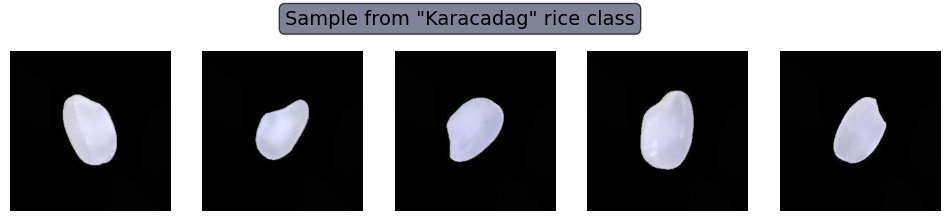

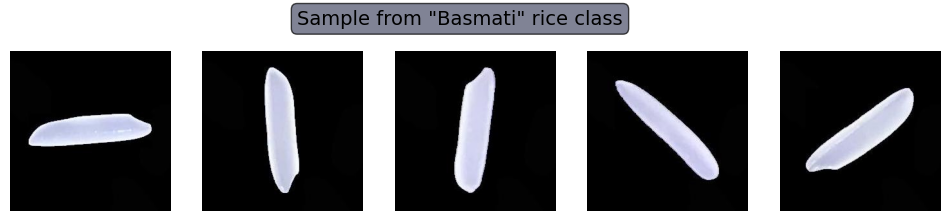

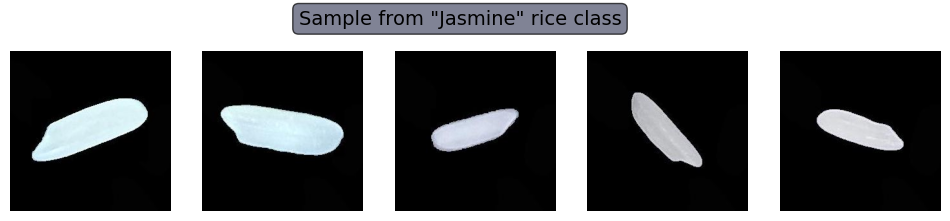

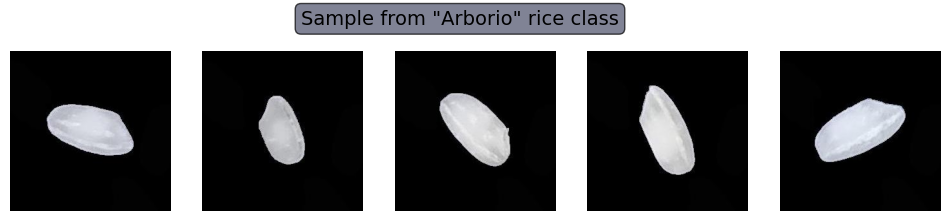

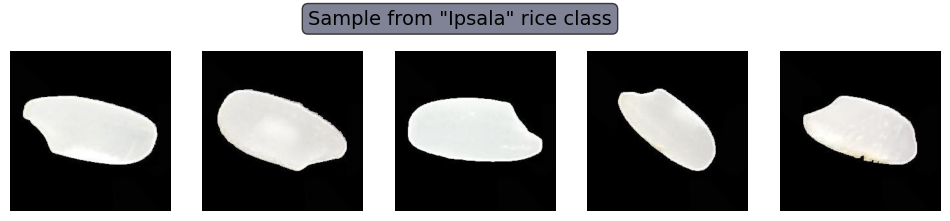

In [4]:
# Plotting random images of each file(class)

for rice_class in Classes : # Loop through each class
    
    # Accessing images in files 
    class_dir = os.path.join(dir_ , rice_class) # The image path of the rice class
    images_path = os.listdir(class_dir) # List of images
    random_images = random.sample(images_path , k = 5) # Random sample of images
    
    # Plotting some sample images
    fig , ax = plt.subplots(1 , 5 , figsize = (12 , 3)) 
    plt.suptitle(f'Sample from "{rice_class}" rice class', fontsize = 14 
                 , bbox=dict(facecolor='#4a4e69', alpha=0.7 , boxstyle='round,pad=0.3') , y = 0.9) # Title for each sample
    
    for i , random_image in enumerate(random_images) : # Loop for each image
        image_path = os.path.join(class_dir , random_image) # Creating image path
        image = tf.keras.utils.load_img(image_path) # Load image
        
        ax[i].imshow(image) # Plot image
        ax[i].axis('off') # Remove the axis
    
    plt.subplots_adjust( hspace = -0.2 )
    plt.show()
    print('\n')
        
        
    
    

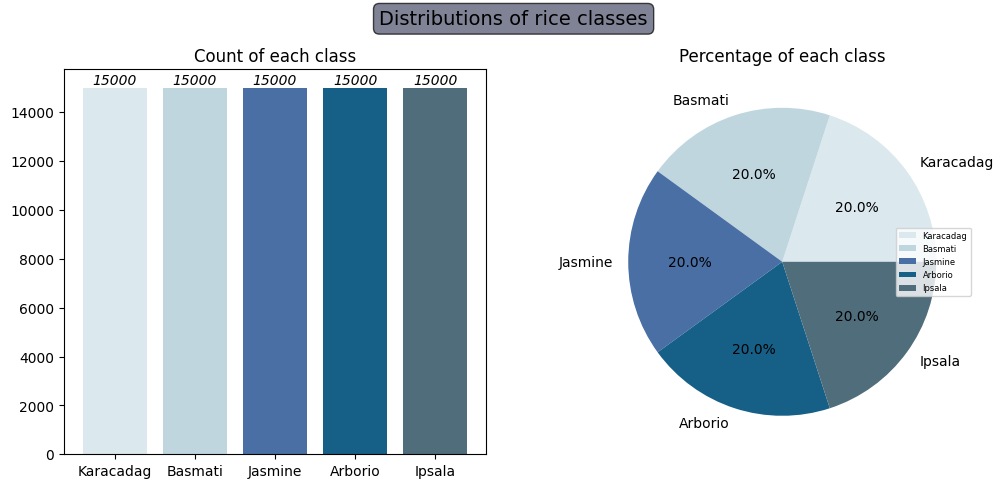

In [5]:
class_count = [] # Storing the amount of data in each class

for rice_class in Classes :
    image_dir = os.path.join(dir_ , rice_class)
    image_path = os.listdir(image_dir)
    count = len(image_path) # Amount of data in each class
    class_count.append(count)
    
    
color=['#dbe9ee' , '#c0d6df','#4a6fa5' , '#166088' , '#4f6d7a' ]
fig , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
plt.suptitle(f'Distributions of rice classes' , fontsize = 14 
                 , bbox=dict(facecolor='#4a4e69', alpha=0.7 , boxstyle='round,pad=0.3') , y = 1)

# Bar Plot
ax[0].set_title("Count of each class")
ax[0].bar(Classes , class_count , color = color) # Creating a bar plot
for i , v in enumerate(class_count):
        ax[0].text(i , v , str(v) , ha='center', va='bottom', fontstyle = "oblique" , fontsize=10) # Putting each bar number on the top

# Pie plot for percentage        
ax[1].set_title('Percentage of each class')
ax[1].pie(class_count,
    labels = Classes , autopct='%1.1f%%' , colors = color)
ax[1].legend(fontsize = 6 , loc = 'center right')

plt.show()


In [6]:
# Loading images through keras pipeline
data = tf.keras.utils.image_dataset_from_directory(dir_ ,
                                                   image_size = (224 , 224) ,
                                                   batch_size = 32 ,
                                                   label_mode = 'categorical') # for 'categorical_crossentropy' loss


Found 75000 files belonging to 5 classes.


In [7]:
scaled_data = data.map(lambda x,y: (x/255 , y)) # Normalizing data


In [8]:
total_batch = len(scaled_data) # Amount of total batches
print(total_batch)


2344


In [9]:
train_size = int(total_batch*.7)+1 # Here we want allocate 70 percent of our data set to train
val_size = int(total_batch*.2)+1
test_size = int(total_batch*.1)
print(train_size + val_size + test_size)


2344


In [10]:
train = scaled_data.take(train_size) # Taking batches as the amount of trains size
val = scaled_data.skip(train_size).take(val_size) # Skipping as the the amount of train size and taking batches as the amount of val size
test = scaled_data.skip(train_size+val_size).take(test_size)


In [11]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (224 , 224 , 3))) # We need to initialize the input shape in the first layer
model.add(BatchNormalization())
model.add(MaxPooling2D()) # Max Pooling layer to reduce the spatial dimensions of the output (downsampling)

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128 , (3,3) , activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128 , (3,3) , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
         
model.add(Flatten())
model.add(Dense(512, activation='relu'))  # Fully connected layer with 512 units
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(5 , activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam' , metrics=['accuracy'])
model.summary() # To get a summary of our data


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 107, 107, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 107, 107, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 51, 51, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 49, 49, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    37,749,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,031,237 (145.08 MB)

 Trainable params: 38,030,405 (145.07 MB)

 Non-trainable params: 832 (3.25 KB)

In [12]:
checkpoint = keras.callbacks.ModelCheckpoint(
    
    filepath='model_checkpoint_epoch_{epoch:02d}.keras',  # Filepath with epoch number in the filename
    verbose=1)  # Verbosity mode; 1 for progress messages

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss', # Quantity to be monitored
    factor = 0.5 , # Factor by which the learning rate will be reduced
    patience = 3 , # Number of epochs with no improvement after which learning rate will be reduced
    verbose = 1 , 
    min_delta = 0.001 , # Threshold for measuring the new optimum, to only focus on significant changes
    min_lr = 1e-5 ) # Lower bound on the learning rate

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', # Quantity to be monitored
    min_delta = 0.001 , # Minimum change in the monitored quantity to qualify as an improvement
    patience = 5 , # Number of epochs with no improvement after which training will be stopped
    verbose = 1 ,
    start_from_epoch = 10 # Number of epochs to wait before starting to monitor improvement
)


In [13]:
start_time = time.time() # Beginning of training

history = model.fit(train, epochs = 30 , validation_data = val ,
                    callbacks = [checkpoint , reduce_lr , early_stop]) # Fitting the model

end_time = time.time() # End of training

training_time = end_time - start_time
print(f"\nTotal training time : {(training_time//60)} minutes and {(training_time%60):.2f} seconds")


Epoch 1/30


I0000 00:00:1726283322.275099      81 service.cc:145] XLA service 0x7d409800a3c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726283322.275201      81 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726283322.275208      81 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   1/1641 ━━━━━━━━━━━━━━━━━━━━ 7:24:51 16s/step - accuracy: 0.2500 - loss: 2.7428

I0000 00:00:1726283334.597862      81 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9107 - loss: 1.6026
Epoch 1: saving model to model_checkpoint_epoch_01.keras
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 209s 117ms/step - accuracy: 0.9107 - loss: 1.6020 - val_accuracy: 0.8097 - val_loss: 4.6538 - learning_rate: 0.0010
Epoch 2/30
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9567 - loss: 0.2620
Epoch 2: saving model to model_checkpoint_epoch_02.keras
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 184s 112ms/step - accuracy: 0.9567 - loss: 0.2619 - val_accuracy: 0.9653 - val_loss: 0.1349 - learning_rate: 0.0010
Epoch 3/30
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9710 - loss: 0.1277
Epoch 3: saving model to model_checkpoint_epoch_03.keras
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 186s 113ms/step - accuracy: 0.9710 - loss: 0.1277 - val_accuracy: 0.9460 - val_loss: 0.2530 - learning_rate: 0.0010
Epoch 4/30
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9774 - loss: 0.0960
Epoch 4: saving model to model_checkpoint_e

In [14]:
# Convert result of training to a df
model_performance = pd.DataFrame(history.history)
print(tabulate(model_performance, headers='keys', tablefmt='psql'))


+----+------------+------------+----------------+---------------+-----------------+
|    |   accuracy |       loss |   val_accuracy |      val_loss |   learning_rate |
|----+------------+------------+----------------+---------------+-----------------|
|  0 |   0.951821 | 0.477296   |       0.809702 |    4.65378    |        0.001    |
|  1 |   0.962504 | 0.205487   |       0.965285 |    0.134878   |        0.001    |
|  2 |   0.97551  | 0.106181   |       0.946029 |    0.252987   |        0.001    |
|  3 |   0.979738 | 0.0857281  |       0.199627 | 1550.27       |        0.001    |
|  4 |   0.976672 | 0.0967933  |       0.201159 | 1671.91       |        0.001    |
|  5 |   0.988136 | 0.0434924  |       0.994336 |    0.0259087  |        0.0005   |
|  6 |   0.991335 | 0.0318718  |       0.967617 |    0.128494   |        0.0005   |
|  7 |   0.991335 | 0.0433614  |       0.401053 |   14.9845     |        0.0005   |
|  8 |   0.99364  | 0.0260081  |       0.972748 |    0.174335   |        0.0

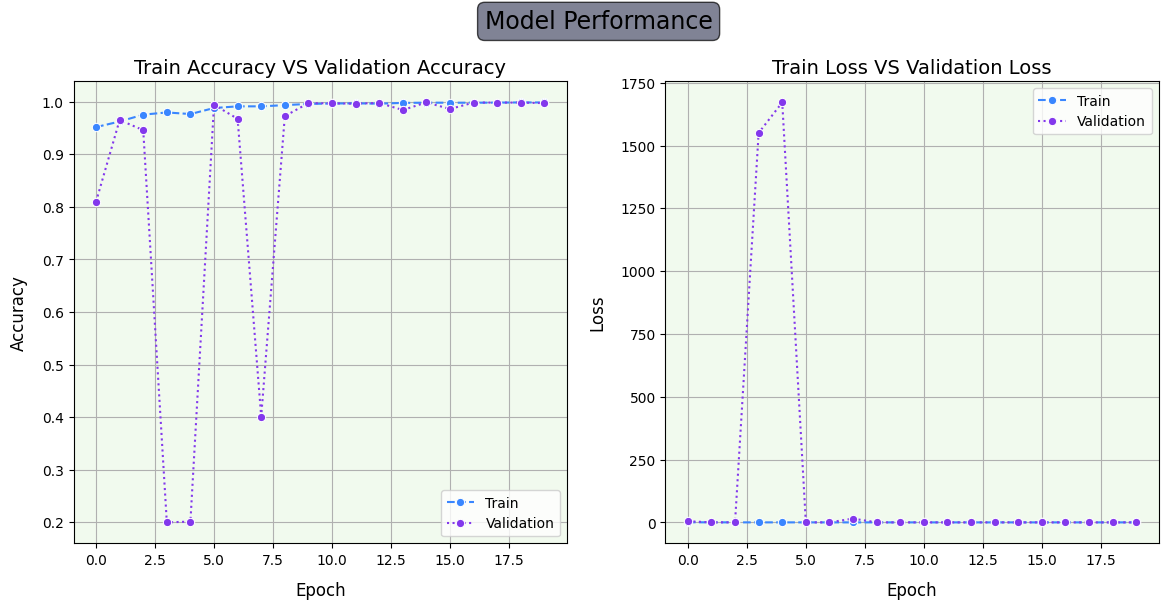

In [15]:
epochs = model_performance.shape[0] # ُStoring the numbers of epochs

fig , ax = plt.subplots(1 , 2 , figsize = (14 , 6))
plt.suptitle(f'Model Performance' , fontsize = 17 
                 , bbox=dict(facecolor='#4a4e69', alpha=0.7 , boxstyle='round,pad=0.3') , y = 1)
# Accuracy plot
ax[0].set_title("Train Accuracy VS Validation Accuracy" , fontsize = 14)
ax[0].set_ylabel("Accuracy" , fontsize = 12 , labelpad = 10)
ax[0].set_xlabel("Epoch" , fontsize = 12 , labelpad = 10)
ax[0].set_facecolor('#f1faee')
sns.lineplot(x = range(epochs) , y = model_performance['accuracy'] , label = 'Train' ,
             color = '#3a86ff' , marker = 'o', ls = '--' , ax = ax[0])
sns.lineplot(x = range(epochs) , y = model_performance['val_accuracy'] , label = 'Validation' ,
             color = '#8338ec' , marker = 'o', ls = ':' , ax = ax[0])
ax[0].legend()
ax[0].grid()

# Loss plot
ax[1].set_title("Train Loss VS Validation Loss" , fontsize = 14)
ax[1].set_ylabel("Loss" , fontsize = 12 , labelpad = 10)
ax[1].set_xlabel("Epoch" , fontsize = 12 , labelpad = 10)
ax[1].set_facecolor('#f1faee')
sns.lineplot(x = range(epochs) , y = model_performance['loss'] , label = 'Train' ,
             color = '#3a86ff' , marker = 'o', ls = '--' , ax = ax[1])
sns.lineplot(x = range(epochs) , y = model_performance['val_loss'] , label = 'Validation' ,
             color = '#8338ec' , marker = 'o', ls = ':' , ax = ax[1])
ax[1].legend()
ax[1].grid()

plt.show()


In [16]:
best_epoch = model_performance['val_loss'].idxmin() # index(epoch) of minimum val loss

# Storing the name of the best model so we can load it
if best_epoch<10 :
    best_model_name = 'model_checkpoint_epoch_{epoch:02d}.keras'.format(epoch = best_epoch)
else :
    best_model_name = 'model_checkpoint_epoch_{epoch:d}.keras'.format(epoch = best_epoch)
print(f"Epoch of the best model : {best_epoch}")    
    
# Load the optimal model saved in output folder after training
best_model = keras.models.load_model(best_model_name)

# Evaluate the model's performance on the test dataset
loss, accuracy = best_model.evaluate(test)

# Display the evaluation results with clear and formatted output
print("\nModel Evaluation Results:")
print(f'Loss: {loss:.5f}')
print(f'Accuracy: {accuracy * 100:.2f}%')


Epoch of the best model : 14
234/234 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.9793 - loss: 0.1222

Model Evaluation Results:
Loss: 0.10248
Accuracy: 98.14%


In [17]:
# Storing true and predicted labels of the batch

raw_test = test.map(lambda x,y: (x*255 , y)) # Re-scale back our test data so we can show the image
test_iterator = raw_test.as_numpy_iterator() # Turn the test data into a numpy iterator so we can take a batch from it
batch = test_iterator.next() # Take a batch

f = lambda x:x/255
temp_batch = f(batch[0])
raw_batch_predict = best_model.predict(temp_batch) # First element of the batch stores images(X)
batch_predict = np.argmax(raw_batch_predict , axis = 1) # So we predict by using that
batch_labels = np.argmax(batch[1] , axis = 1) # And the second element shows the labels so we store the index of the max argument


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


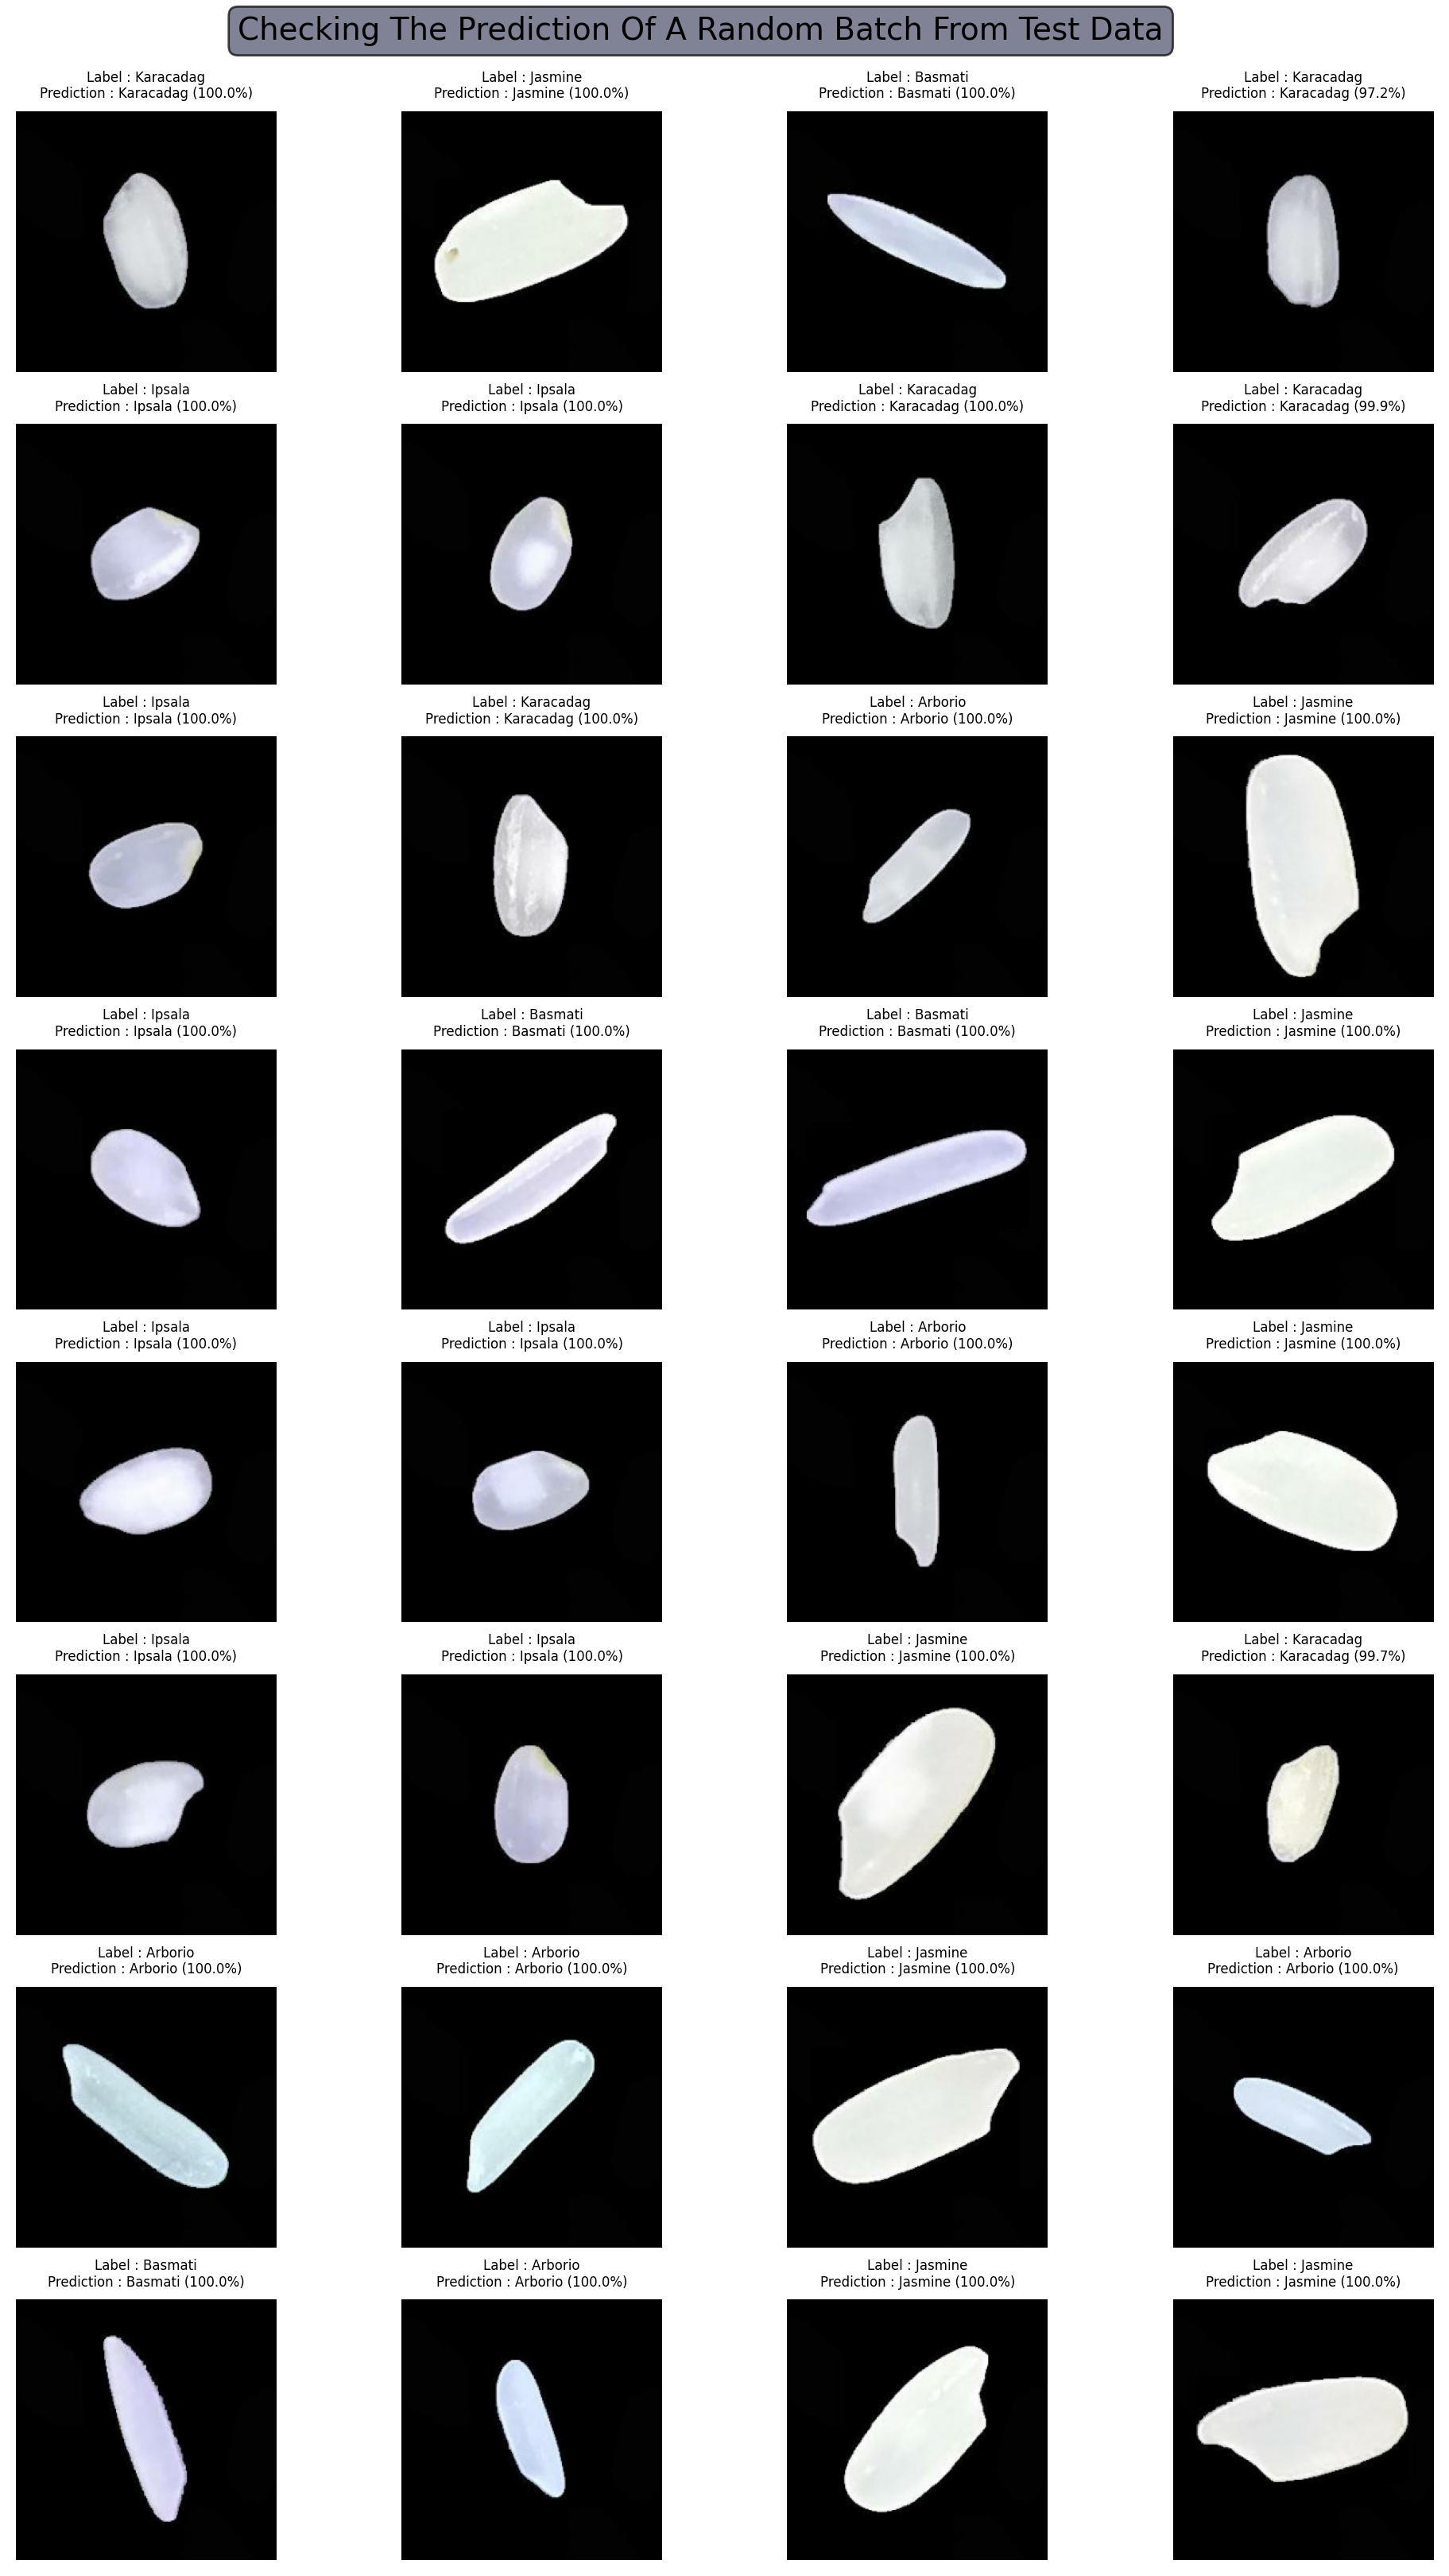

In [18]:
# Plotting the batch

fig , ax = plt.subplots(8,4 , figsize = (12 , 20) , dpi=200)
ax = ax.flatten() # Flatten ax so we could iterate tthrough it
plt.suptitle(f'Checking The Prediction Of A Random Batch From Test Data', fontsize = 14 
                 , bbox=dict(facecolor='#4a4e69', alpha=0.7 , boxstyle='round,pad=0.3') , y = 0.91)

for n , i in enumerate(ax) : 

    i.imshow(batch[0][n].astype(int)) # Plotting the image
    i.axis('off') # Remove the axis
    i.set_title(f"Label : {Classes[batch_labels[n]]}\n"
                f"Prediction : {Classes[batch_predict[n]]} ({100*np.max(raw_batch_predict[n]):.1f}%)" ,
                fontsize = 6) # Setting true and predicted label as the title
plt.show()
    

In [19]:
# Initialize a list to hold all labels of the test dataset
true_labels = []
pred_labels = []

# Iterate through the test dataset to access labels
for image , labels in test:
    
    y_pred_raw = best_model.predict_on_batch(image) # Predict a batch of image
    pred_labels.extend(np.argmax(y_pred_raw , axis = 1)) # Appened it to the pediction list
    
    # Convert labels tensor to a NumPy array and extend the list
    true_labels.extend(labels.numpy())

# Convert list to a NumPy array for easier handling
true_labels = np.array(true_labels)

Y_test = np.argmax(true_labels , axis = 1)
pred_labels = np.array(pred_labels)


               precision    recall  f1-score   support

   Karacadag       1.00      0.92      0.96      1505
     Basmati       0.99      1.00      1.00      1514
     Jasmine       1.00      1.00      1.00      1533
     Arborio       0.99      0.99      0.99      1418
      Ipsala       0.93      1.00      0.96      1510

    accuracy                           0.98      7480
   macro avg       0.98      0.98      0.98      7480
weighted avg       0.98      0.98      0.98      7480



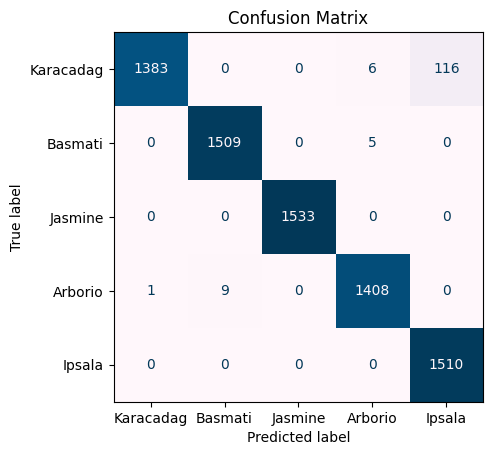

In [20]:
# Classification report and confusion matrix

print('\33[34m' , classification_report(Y_test, pred_labels , target_names = Classes))

cm_display = ConfusionMatrixDisplay(confusion_matrix(Y_test , pred_labels) , display_labels = Classes)
cm_display.plot(colorbar=False, cmap = 'PuBu')
plt.title('Confusion Matrix')
plt.show()
